<h2><a href="https://leetcode.com/problems/lexicographically-smallest-equivalent-string">1061. Lexicographically Smallest Equivalent String</a></h2><h3>Medium</h3><hr><p>You are given two strings of the same length <code>s1</code> and <code>s2</code> and a string <code>baseStr</code>.</p>

<p>We say <code>s1[i]</code> and <code>s2[i]</code> are equivalent characters.</p>

<ul>
	<li>For example, if <code>s1 = &quot;abc&quot;</code> and <code>s2 = &quot;cde&quot;</code>, then we have <code>&#39;a&#39; == &#39;c&#39;</code>, <code>&#39;b&#39; == &#39;d&#39;</code>, and <code>&#39;c&#39; == &#39;e&#39;</code>.</li>
</ul>

<p>Equivalent characters follow the usual rules of any equivalence relation:</p>

<ul>
	<li><strong>Reflexivity:</strong> <code>&#39;a&#39; == &#39;a&#39;</code>.</li>
	<li><strong>Symmetry:</strong> <code>&#39;a&#39; == &#39;b&#39;</code> implies <code>&#39;b&#39; == &#39;a&#39;</code>.</li>
	<li><strong>Transitivity:</strong> <code>&#39;a&#39; == &#39;b&#39;</code> and <code>&#39;b&#39; == &#39;c&#39;</code> implies <code>&#39;a&#39; == &#39;c&#39;</code>.</li>
</ul>

<p>For example, given the equivalency information from <code>s1 = &quot;abc&quot;</code> and <code>s2 = &quot;cde&quot;</code>, <code>&quot;acd&quot;</code> and <code>&quot;aab&quot;</code> are equivalent strings of <code>baseStr = &quot;eed&quot;</code>, and <code>&quot;aab&quot;</code> is the lexicographically smallest equivalent string of <code>baseStr</code>.</p>

<p>Return <em>the lexicographically smallest equivalent string of </em><code>baseStr</code><em> by using the equivalency information from </em><code>s1</code><em> and </em><code>s2</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> s1 = &quot;parker&quot;, s2 = &quot;morris&quot;, baseStr = &quot;parser&quot;
<strong>Output:</strong> &quot;makkek&quot;
<strong>Explanation:</strong> Based on the equivalency information in s1 and s2, we can group their characters as [m,p], [a,o], [k,r,s], [e,i].
The characters in each group are equivalent and sorted in lexicographical order.
So the answer is &quot;makkek&quot;.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> s1 = &quot;hello&quot;, s2 = &quot;world&quot;, baseStr = &quot;hold&quot;
<strong>Output:</strong> &quot;hdld&quot;
<strong>Explanation: </strong>Based on the equivalency information in s1 and s2, we can group their characters as [h,w], [d,e,o], [l,r].
So only the second letter &#39;o&#39; in baseStr is changed to &#39;d&#39;, the answer is &quot;hdld&quot;.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> s1 = &quot;leetcode&quot;, s2 = &quot;programs&quot;, baseStr = &quot;sourcecode&quot;
<strong>Output:</strong> &quot;aauaaaaada&quot;
<strong>Explanation:</strong> We group the equivalent characters in s1 and s2 as [a,o,e,r,s,c], [l,p], [g,t] and [d,m], thus all letters in baseStr except &#39;u&#39; and &#39;d&#39; are transformed to &#39;a&#39;, the answer is &quot;aauaaaaada&quot;.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= s1.length, s2.length, baseStr &lt;= 1000</code></li>
	<li><code>s1.length == s2.length</code></li>
	<li><code>s1</code>, <code>s2</code>, and <code>baseStr</code> consist of lowercase English letters.</li>
</ul>


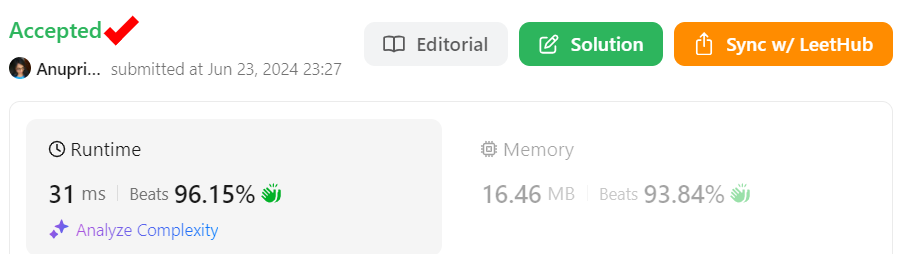

In [3]:
class Solution:
    def smallestEquivalentString(self, s1: str, s2: str, baseStr: str) -> str:
        uf = UnionFind(26)
        for c1, c2 in zip(s1, s2):
            c1 = ord(c1) - ord('a')
            c2 = ord(c2) - ord('a')
            uf.union(c1, c2)

        string = ''
        for char in baseStr:
            node = ord(char) - ord('a')
            string += chr(uf.find_root(node) + ord('a'))

        return string


class UnionFind:
    def __init__(self, size):
        self.root = list(range(size))
        self.rank = [1]* size


    def find_root(self, node):
        if self.root[node] != node:
            self.root[node] = self.find_root(self.root[node])  # for each char fetching its root node or ultimate parent
        return self.root[node]                 

    def union(self, u, v):
        root_u = self.find_root(u)
        root_v = self.find_root(v)

        if root_u == root_v:
            return 

        if root_u < root_v:      # Making lexicographically smallest char as root
            self.root[root_v] = root_u
        else:
            self.root[root_u] = root_v

In [4]:
# Test cases
solution = Solution()
print(solution.smallestEquivalentString("parker", "morris", "parser"))  # Expected output: "makkek"
print(solution.smallestEquivalentString("hello", "world", "hold"))      # Expected output: "hdld"
print(solution.smallestEquivalentString("leetcode", "programs", "sourcecode"))  # Expected output: "aauaaaaada"


makkek
hdld
aauaaaaada
